# 6주차 과제

Made by 35기 코딩부장 류제현

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 시계열데이터(주가) 분석

    1-1) 우선 삼성전자주가, 카카오주가 csv파일을 불러옵시다 

            Date를 인덱스로 설정하고, datetime으로 변환해줍니다

In [2]:
samsung = pd.read_csv("삼성전자주가.csv", index_col=0, parse_dates=True)
kakao = pd.read_csv("카카오주가.csv", index_col=0 , parse_dates=True)

    1-2) 종가(Close)를 사용하여, 종가와 함께 **삼성전자**의 120일 이동평균선과 20일 이동평균선을 그려봅시다

In [3]:
# 이동평균을 계산합니다
samsung["Moving_avg_120"] = samsung.Close.rolling(window=120).mean()
samsung["Moving_avg_12"] = samsung.Close.rolling(window=20).mean()

samsung

,Open,High,Low,Close,Volume,Moving_avg_120,Moving_avg_12
Date,,,,,,,
2019-01-31,46650,47050,46150,46150,21621145,NaN,NaN
2019-02-01,46650,46950,46250,46350,13832454,NaN,NaN
2019-02-07,46800,47100,46200,46200,15872001,NaN,NaN
2019-02-08,45700,45700,44650,44800,12689196,NaN,NaN
2019-02-11,44500,45000,44250,45000,11125044,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,58887.500000,59785.0
2022-12-26,58000,58100,57700,57900,6756411,58894.166667,59675.0
2022-12-27,58000,58400,57900,58100,10667027,58901.666667,59550.0


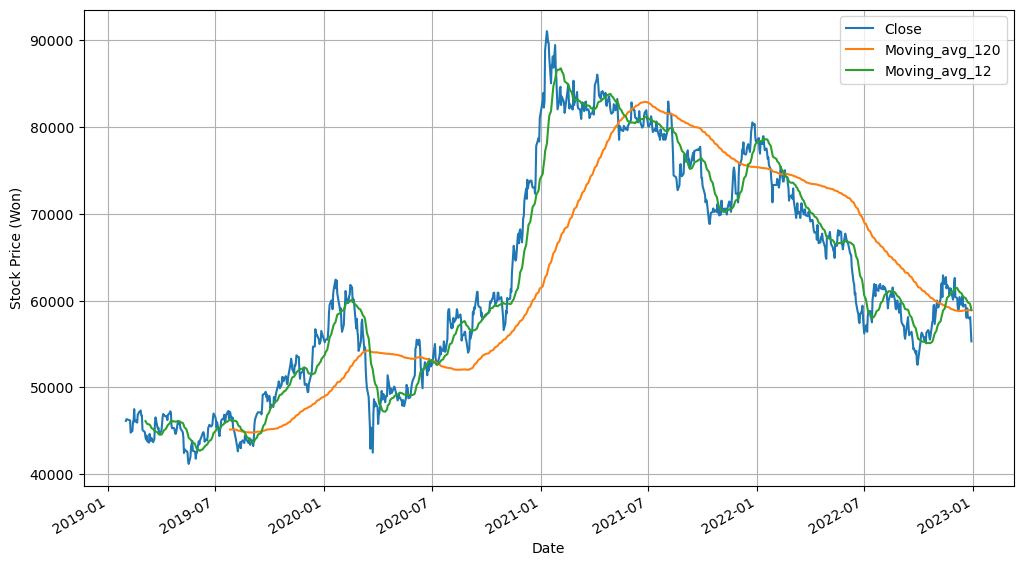

In [4]:
# plotting
samsung[["Close","Moving_avg_120","Moving_avg_12"]].plot(figsize=(12,7))
plt.grid()
plt.ylabel("Stock Price (Won)");

    1-3) 카카오 주가(종가)그래프에, 볼린저 밴드를 추가해봅시다 볼린저 밴드의 공식은 아래와 같습니다 (n=20, m=2를 사용합니다)

* 볼린저 밴드는 Matplotlib의 fill_between 함수를 사용해 그릴 수 있습니다 (그림의 투명도는 alpha 매개변수로 조절합니다)

---
    볼린저 밴드 공식

$BOLU = MA(TP, n) + m * \sigma[TP, n] $

$BOLD = MA(TP, n) - m * \sigma[TP, n] $


$Where: $

$BOLU = $ Upper Bollinger Band

$BOLD = $ Lower Bollinger Band

$MA = $ Moving Average

$TP = $ (High $+$ Low $+$ Close) $ \div 3 $ 

$n = $ Number of days in smoothing period (typically 20)

$m = $ Number of standard deviations (typically 2)

$\sigma[TP, n] = $ Standard Deviation over last $n$ periods of $TP$

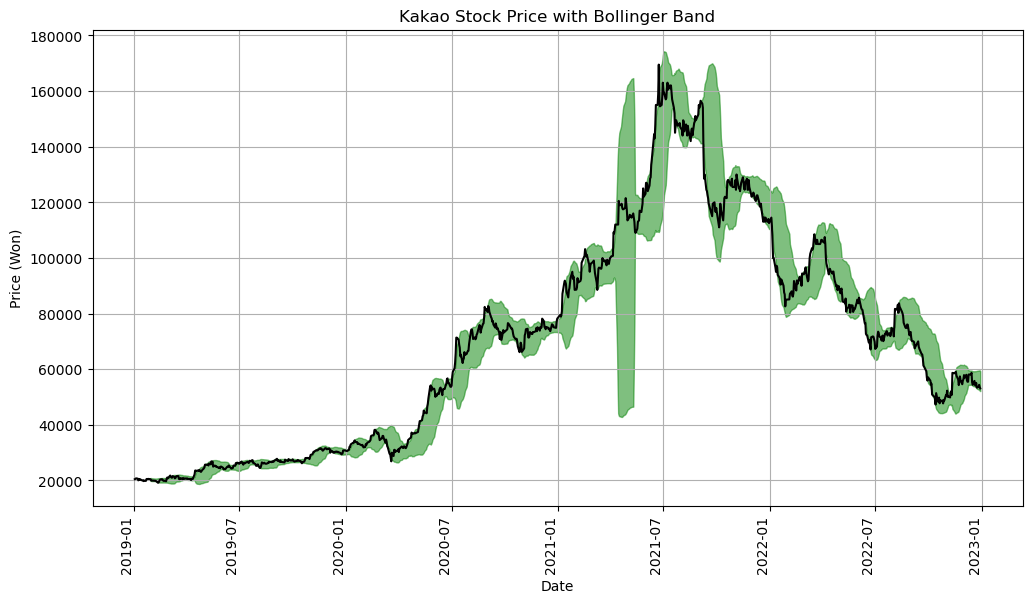

In [5]:
n = 20
m = 2

TP = (kakao.High + kakao.Low + kakao.Close) / 3 

kakao["BOLU"] = TP.rolling(window=n).mean() + m*(TP.rolling(window=n).std())
kakao["BOLD"] = TP.rolling(window=n).mean() - m*(TP.rolling(window=n).std())

plt.figure(figsize=(12,7))
kakao.Close.plot(c='k')
plt.fill_between(kakao.index, kakao.BOLU, kakao.BOLD, alpha=0.5, color='g')

plt.title("Kakao Stock Price with Bollinger Band")
plt.ylabel("Price (Won)")
plt.grid()
plt.xticks(rotation=90);

    1-4) 카카오와 삼성전자의 CAGR을 구해봅시다(종가(Close) 기준)

---

$CAGR(t_0, t_n) = ({V(t_n) \over V(t_0)})^{1 \over {t_n - t_0}} - 1$

$Where \ V(t_0)$는 시작값, $V(t_n)$는 끝값, $t_n - t_0$는 년수이다.

In [6]:
# 5년간 CAGR
cagr_kakao_5 = (kakao.Close.iloc[-1] / kakao.Close.iloc[0])**(1/5) - 1 
cagr_samsung_5 = (samsung.Close.iloc[-1] / samsung.Close.iloc[0])**(1/5) - 1 

In [7]:
cagr_kakao_5, cagr_samsung_5

(0.20999230087537168, 0.03683747363593182)

## 2. 주성분 분석(PCA)과 머신러닝

    음원 스트리밍 기업 Spotify에서 받아온 실제 데이터셋을 사용해 봅시다

In [12]:
spotify = pd.read_csv("spotify.csv")
print(spotify.shape) #32833개의 Data

# 컬럼의 일부만 사용하겠습니다
spotify = spotify.loc[:,['playlist_genre', 'danceability',
                         'energy','loudness','speechiness', 'acousticness', 
                         'instrumentalness','liveness', 'valence', 'tempo']]
spotify.head()

(32833, 23)


,playlist_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976


    2-1) playlist_genre를 기준으로, 각 특성의 평균값을 구해 봅시다. (pandas의 groupby를 사용하면 간단합니다)

        * 가장 energy의 평균값이 높은 음악 장르는 무엇인가요?
        * 가장 acousticness가 높은 장르는 무엇인가요? 

In [13]:
spotify.groupby(by="playlist_genre").mean()

# energy: EDM
# Acousticness: R&B

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
playlist_genre,,,,,,,,,
edm,0.655041,0.802476,-5.427445,0.086695,0.081504,0.218578,0.211859,0.400656,125.768024
latin,0.713287,0.708312,-6.264455,0.102653,0.210920,0.044447,0.180626,0.605510,118.622354
pop,0.639302,0.701028,-6.315328,0.073991,0.170794,0.059876,0.176833,0.503521,120.743178
r&b,0.670179,0.590934,-7.864848,0.116792,0.259904,0.028920,0.175268,0.531231,114.222156
rap,0.718353,0.650708,-7.042269,0.197506,0.192479,0.075997,0.191654,0.505090,120.654908
rock,0.520548,0.732813,-7.588895,0.057696,0.145189,0.062417,0.203135,0.537352,124.988786


    2-2) Robust Scaler를 사용해서 데이터 스케일링을 해줍시다

from ~ import RobustScaler

* play_list_genre는 제외하고 변환해야합니다

In [60]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
spotify_robust = robust.fit_transform(spotify.iloc[:,1:])
spotify_robust

array([[ 3.83838384e-01,  7.52895753e-01,  1.00170164e+00, ...,
        -3.97295557e-01,  1.65745856e-02,  1.53130337e-03],
       [ 2.72727273e-01,  3.62934363e-01,  3.39478162e-01, ...,
         1.48100451e+00,  5.00000000e-01, -6.48212498e-01],
       [ 1.51515152e-02,  8.10810811e-01,  7.75382870e-01, ...,
        -1.09465551e-01,  2.79005525e-01,  5.96030390e-02],
       ...,
       [-7.22222222e-01,  3.86100386e-01,  3.59330686e-01, ...,
         1.48100451e-01, -2.09944751e-01,  1.76836092e-01],
       [-2.32323232e-01,  6.44787645e-01,  7.95519002e-01, ...,
         1.39085641e+00, -5.63535912e-01,  1.77395606e-01],
       [-3.48484848e-01,  6.29343629e-01,  4.52353942e-01, ...,
         3.96007727e+00, -1.16740331e+00,  1.76688851e-01]])

    2-3)  주성분 분석으로 데이터셋을 3차원으로 줄여봅시다

    * 3개의 주성분은 데이터셋의 분산을 몇 퍼센트 설명하나요? 

* 주의: 장르는 pca 모형에 넣으면 안됩니다**

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
spotify_pca = pca.fit_transform(spotify_robust)

sum(pca.explained_variance_ratio_) #분산의 99.9%를 설명합니다!!

0.9985663922145144

    2-4) 3개의 차원으로 줄인 데이터셋을 3차원으로 시각화해봅시다

    * scatter plot으로 그리는데, 각 point의 색상이 genre가 되도록 그리겠습니다. 아래 예시 코드가 이어집니다

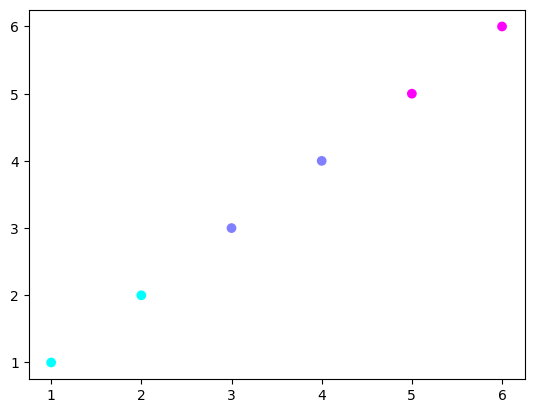

In [62]:
# 문제 풀이를 위한 예시코드입니다

# 데이터 생성
x = [1,2,3,4,5,6]
y = [1,2,3,4,5,6]
c = [0,0,1,1,2,2]

# 색상(c)을 하나의 색이 아닌, array로 주고, colormap을 의미하는 cmap을 지정해주면 됩니다
# 컬러맵은 다양한 것이 있는데, 여기서 확인할 수 있습니다 -> https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py 
plt.scatter(x,y,c=c, cmap="cool"); # binary, cool, hot 등..

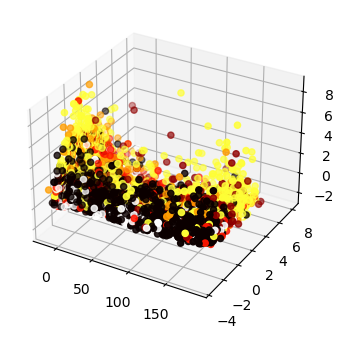

In [63]:
# PCA로 차원을 3개로 줄인 spotify 데이터셋을 시각화해봅시다

# 이 코드는 문자열로 된 장르를 숫자로 변환해줍니다(c=genre 를 해주면 되겠죠?)
genre = spotify.playlist_genre.astype('category').cat.codes

# 3d plot을 그려줍니다
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(spotify_pca[:,0], spotify_pca[:,1], spotify_pca[:,2], c=genre, cmap="hot");

    2-5) 기존 아무 처리도 하지 않은 데이터셋(PCA, 스케일링 안한 데이터셋)으로, 음악 장르를 분류하는 머신러닝 모델을 만들어 봅시다 

**Random Forest를 사용해주세요!**
    
    * Train-set과 Test-set으로 데이터셋을 분리해주세요 (sklearn의 train_test_split(X_data, y_data, stratify=y_data) 꼴로 분리해주세요)
    * 1. 학습시간이 얼마나 걸렸나요?
    * 2. Test-set에 대한 정확도는 얼마인가요?

In [68]:
# X(피쳐)와 y(label) 분리
spotify_x = spotify.iloc[:,1:]
spotify_y = spotify.iloc[:,0]

In [69]:
# train-test 셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(spotify_x.values, spotify_y.values, stratify=spotify_y)

In [70]:
# 모델 학습(train-data) 및 학습 시간 측정
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
t0 = time.time()
random_clf.fit(X_train, y_train)
t1 = time.time()

# 소요시간 출력
t1-t0

6.029521465301514

In [71]:
# Test-set에 대한 예측 정확도 출력 
random_clf.score(X_test, y_test)

0.550615178462663

    2-6) PCA로 차원을 3개로 줄인 데이터셋을 사용하여, 음악 장르를 분류하는 머신러닝 모델을 만들어 봅시다

**동일한 하이퍼파라미터를 가진 RandomForest 모델을 사용해주세요**

1. Robust Scaler를 사용해 앞서 train-test-split으로 분리한 데이터를 scaling해 주세요
2. PCA를 사용해, 데이터를 3개의 차원으로 축소해주세요
3. 학습시간이 얼마나 걸렸나요?
4. Test-set에 대한 정확도는 얼마인가요?

In [72]:
# 1. Robust Sclaer
## Note) Train data에는 fit_transform, test data에는 transform!

from sklearn.preprocessing import RobustScaler
robust = RobustScaler()

X_train_robust = robust.fit_transform(X_train)
X_test_robust = robust.transform(X_test)

In [73]:
# 2. PCA 차원축소
## 여기서도 Train data에는 fit_transform, test data에는 transform!

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_robust)
X_test_pca = pca.transform(X_test_robust)

In [74]:
# 모델 학습 및 시간 측정
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
t0 = time.time()
forest.fit(X_train_pca, y_train)
t1 = time.time()

# 소요시간 출력
t1-t0

5.4293928146362305

In [75]:
# Test-set에 대한 예측 정확도 
forest.score(X_test_pca, y_test)

0.40431234011450845